In [2]:
from preprocess import Preprocess
from kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [3]:
data = Preprocess.open("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
filtered_data = Preprocess.filter_sem_eval(X=data, HS='0', TR='0', AG='0')
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 9000
INFO:root:After applying filters: 5093
INFO:root:Data length after removing invalid tweets: 1030
INFO:root:Explained variance of the SVD step: 29%


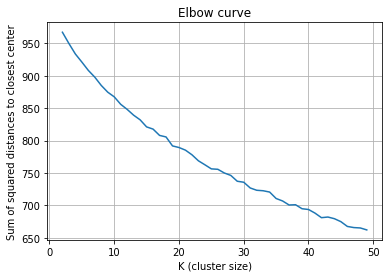

In [4]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

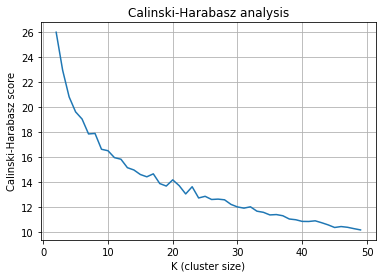

In [5]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

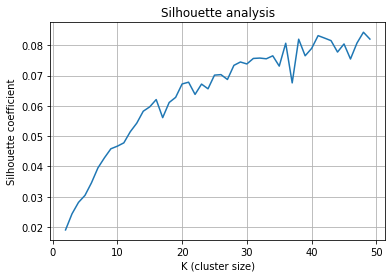

In [6]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

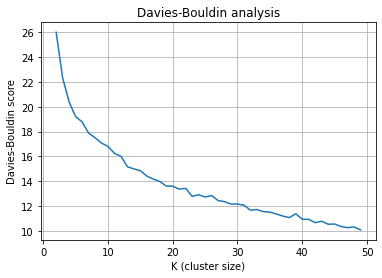

In [7]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [9]:
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 like immigrant people just bitch fuck don woman cunt dick

Cluster 1:
 men women rape just like trash say woman man bitch



In [10]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [429 974 868 746 146]
['7323', "It's what I do, it's who I am 😊", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8935', 'Im so sick of people treating me like SHIT then try to come back in my life after they changed Fuck you fuck your growth cause idgaf skank bitch', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8498', "who the fuck is calling my girl a whore and a bitch? She hasn't even been at that school for a whole month, people are fucking stupid", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8215', "People love it when you tell them about themselves.... Just because the truth hurts like a bitch doesn't mean you have to act like one", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['3512', "Some people really dont understand why I get so upset at injustices happening in this count